## Heart Attack Prediction Decision Tree Model
In this notebook, I will create a Decision Tree Model to predict whether a patient is likely to get a heart attack or not. I am training the model using the Heart Attack Analysis & Prediction Dataset on Kaggle. I will be using GridSearchCV for hyper-parameter tuning.

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Loading the Data

In [127]:
data = pd.read_csv('heart_data.csv')
data = data.rename(columns={'output':'target'})
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [128]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
target        int64
dtype: object

In [129]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
target        2
dtype: int64

In [130]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

## Feature description
**age**: age of the patient

**sex**: sex of the patient

**exang**: exercise induced angina (1 = yes; 0 = no)

**ca**: number of major vessels (0-3)

**cp**: Chest Pain type chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

**trtbps**: resting blood pressure (in mm Hg)

**chol**: cholestoral in mg/dl fetched via BMI sensor

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg**: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: maximum heart rate achieved

**target**: experienced heart attack (0 = no, 1 = yes)

## Exploratory Data Analysis

In [131]:
correlation = data.corr().round(3)
correlation

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trtbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalachh,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exng,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


<Axes: >

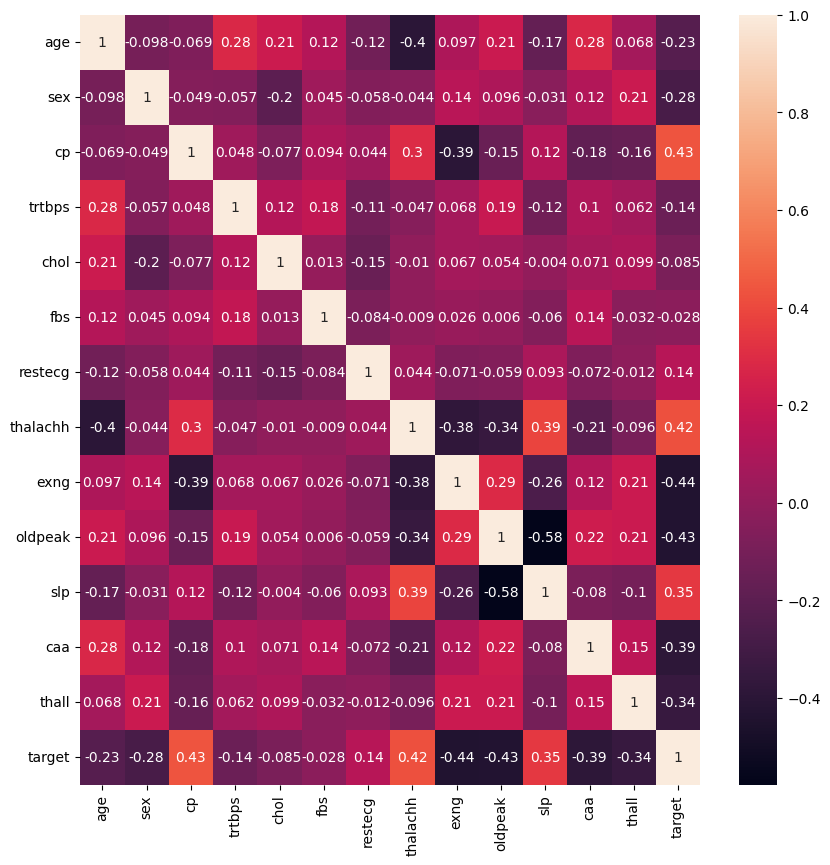

In [132]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

Above is a heatmap showing the correlation between different features and the target variable. Features "cp", "thalachh", "exng", "oldpeak", "slp", "caa", and "thall" show a moderate strength of correlation to our target variable.

In [133]:
data = data[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target']]
data

,cp,thalachh,exng,oldpeak,slp,caa,thall,target
0,3,150,0,2.3,0,0,1,1
1,2,187,0,3.5,0,0,2,1
2,1,172,0,1.4,2,0,2,1
3,1,178,0,0.8,2,0,2,1
4,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...
298,0,123,1,0.2,1,0,3,0
299,3,132,0,1.2,1,0,3,0
300,0,141,0,3.4,1,2,3,0
301,0,115,1,1.2,1,1,3,0


Since the other features show a weak correlation to the target variable, I remove them and only keep the features that had a moderate strength of correlation.

## Preprocessing

In [134]:
X = data.iloc[:, :-1]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I split the data into train and test sets where the training set is 80% of the data and the test set is 20% of the data. I set the random state to 42 for reproducibility purposes.

## Hyper-parameter Tuning and Training the Model

In [135]:
params = {'criterion':['gini', 'entropy', 'log_loss'],
          'splitter':['best', 'random'],
          'max_depth':[None, 2, 3, 4, 5, 6],
          'min_samples_split':[2, 5, 10],
          'min_samples_leaf':[1, 5, 10, 15],
          'min_impurity_decrease':[0.0, 0.01, 0.005]}

clf = tree.DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid=params, cv=10, n_jobs=-1)

In [136]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_impurity_decrease': [0.0, 0.01, 0.005],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [137]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

In [138]:
grid.best_score_

0.835

In [139]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [140]:
best_params = grid.best_params_
model = grid.best_estimator_

model = model.fit(X_train, y_train)

In [141]:
prob = model.predict_proba(X_test)
prob_df = pd.DataFrame(prob, columns=['probability of 0', 'probability of 1']) #61 rows
prob_df[(prob_df['probability of 0'] < 0.3) | (prob_df['probability of 1'] < 0.3)].reset_index() #46 rows

,index,probability of 0,probability of 1
0,0,1.000000,0.000000
1,2,0.217391,0.782609
2,3,1.000000,0.000000
3,4,0.217391,0.782609
4,5,0.044118,0.955882
5,7,1.000000,0.000000
6,8,1.000000,0.000000
7,10,0.050000,0.950000
8,12,0.044118,0.955882
9,13,0.941176,0.058824


In [142]:
accuracy = accuracy_score(y_test, model.predict(X_test))
print('Model accuracy: ' + str(accuracy))

Model accuracy: 0.819672131147541


After using GridSearchCV for hyper-parameter tuning and training the model, the accuracy of the model on the test set is around 81.97%. 46 out of 61 patients are predicted to be in their respective class with a probability of over 70% by the model.

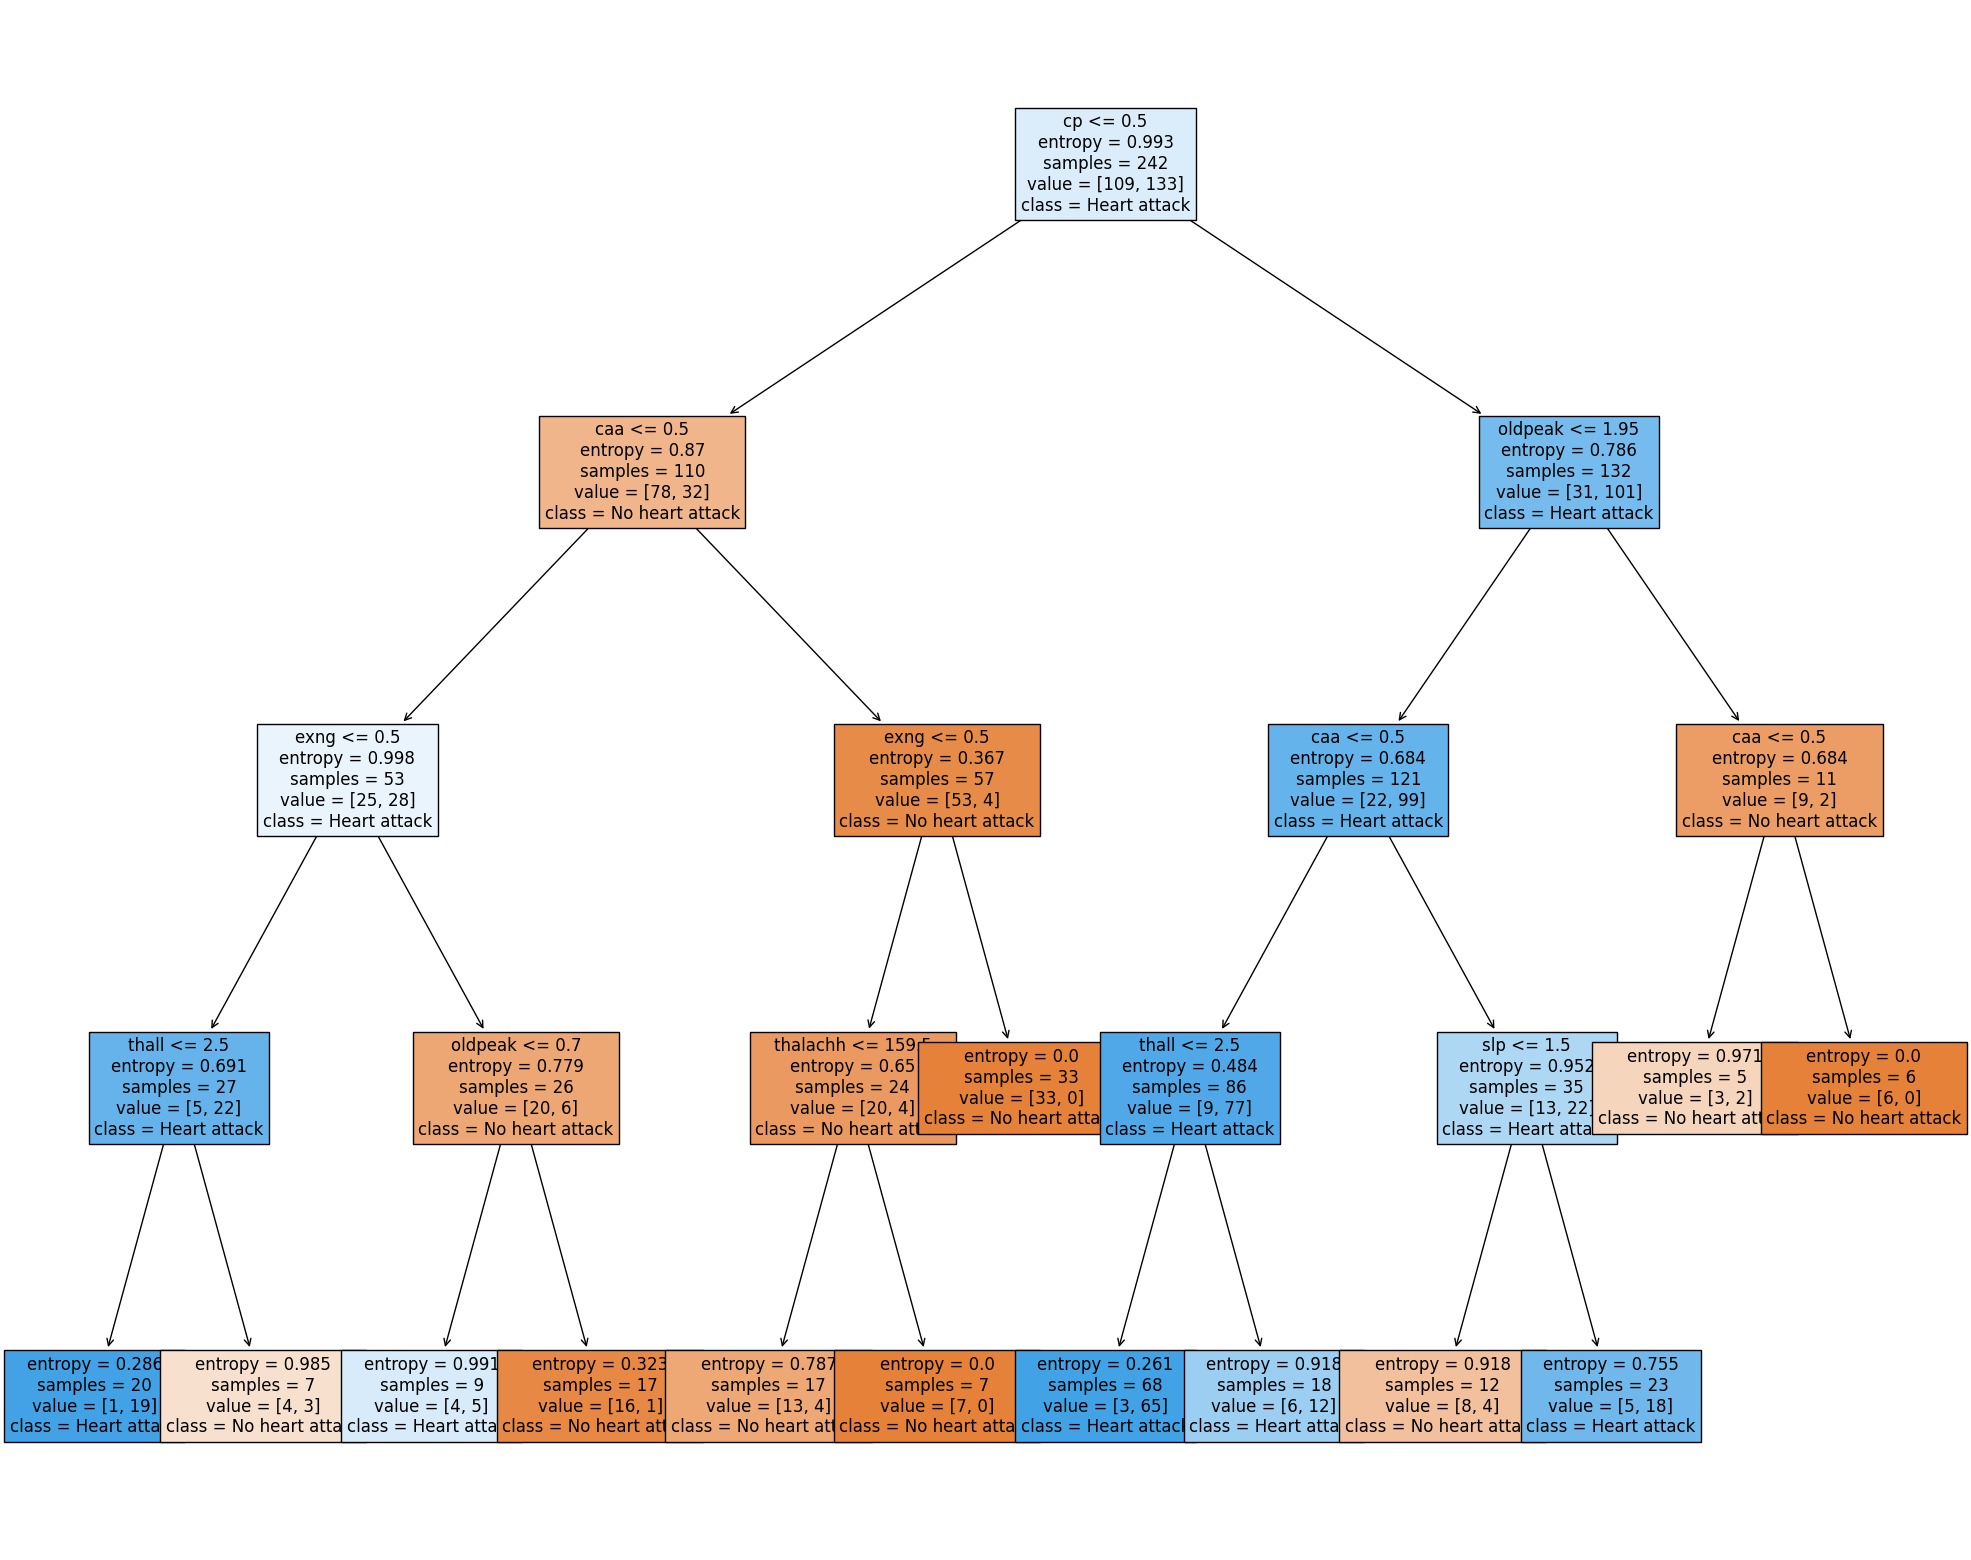

In [143]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model,
                   feature_names=X.columns,
                   class_names={0:'No heart attack', 1:'Heart attack'},
                   filled=True, fontsize=12)

Above is the depiction of the decision tree model.

## Improving Model Accuracy

Text(0.5, 1.0, 'Feature Importance')

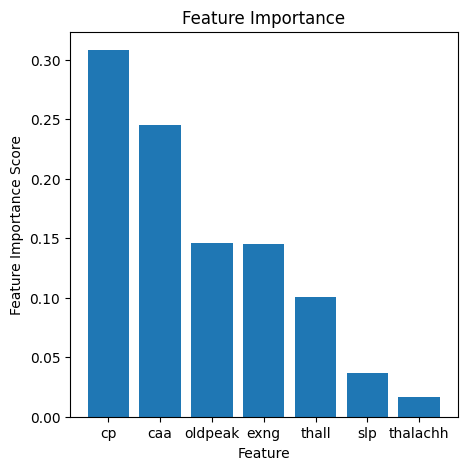

In [144]:
feature_importance = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(0, ascending=False)
feature_importance = feature_importance.reset_index().rename(columns={'index':'feature', 0:'score'})
plt.figure(figsize = (5, 5))
plt.bar(feature_importance['feature'], feature_importance['score'])
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance')

Above is a chart depicting the importance of each feature in the model.

In [145]:
selected_features = feature_importance[feature_importance['score'] > 0.1]
selected_features = selected_features['feature'].to_numpy()
selected_data = data[np.append(selected_features, 'target')]
selected_data

,cp,caa,oldpeak,exng,thall,target
0,3,0,2.3,0,1,1
1,2,0,3.5,0,2,1
2,1,0,1.4,0,2,1
3,1,0,0.8,0,2,1
4,0,0,0.6,1,2,1
...,...,...,...,...,...,...
298,0,0,0.2,1,3,0
299,3,0,1.2,0,3,0
300,0,2,3.4,0,3,0
301,0,1,1.2,1,3,0


I only keep the features with a score bigger than 0.1 and use them to retrain the model.

In [146]:
X = selected_data.iloc[:, :-1]
y = selected_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
params = {'criterion':['gini', 'entropy', 'log_loss'],
          'splitter':['best', 'random'],
          'max_depth':[None, 2, 3, 4, 5, 6],
          'min_samples_split':[2, 5, 10],
          'min_samples_leaf':[1, 5, 10, 15],
          'min_impurity_decrease':[0.0, 0.01, 0.005]}

clf = tree.DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid=params, cv=10, n_jobs=-1)

In [148]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_impurity_decrease': [0.0, 0.01, 0.005],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [149]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.005,
                       min_samples_leaf=5, min_samples_split=10,
                       splitter='random')

In [150]:
grid.best_score_

0.8265

In [151]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.005,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'random'}

In [152]:
best_params = grid.best_params_
new_model = grid.best_estimator_

new_model = new_model.fit(X_train, y_train)

In [153]:
new_prob = new_model.predict_proba(X_test)
new_prob_df = pd.DataFrame(new_prob, columns=['probability of 0', 'probability of 1']) #61 rows
new_prob_df[(new_prob_df['probability of 0'] < 0.3) | (new_prob_df['probability of 1'] < 0.3)].reset_index() #47 rows

,index,probability of 0,probability of 1
0,0,0.929825,0.070175
1,3,0.929825,0.070175
2,5,0.069767,0.930233
3,7,0.929825,0.070175
4,8,0.929825,0.070175
5,10,0.069767,0.930233
6,12,0.069767,0.930233
7,13,0.933333,0.066667
8,14,0.069767,0.930233
9,15,0.069767,0.930233


In [154]:
new_accuracy = accuracy_score(y_test, new_model.predict(X_test))

print('Old Model accuracy: ' + str(accuracy))
print('New Model accuracy: ' + str(new_accuracy))
print('Accuracy improved by ' + str(new_accuracy - accuracy))

Old Model accuracy: 0.819672131147541
New Model accuracy: 0.8524590163934426
Accuracy improved by 0.032786885245901565


After using GridSearchCV for hyper-parameter tuning and training the model using the newly selected features, the model accuracy increases by around 3.28%. 46 out of 61 patients are predicted to be in their respective class with a probability of over 80% by the model.

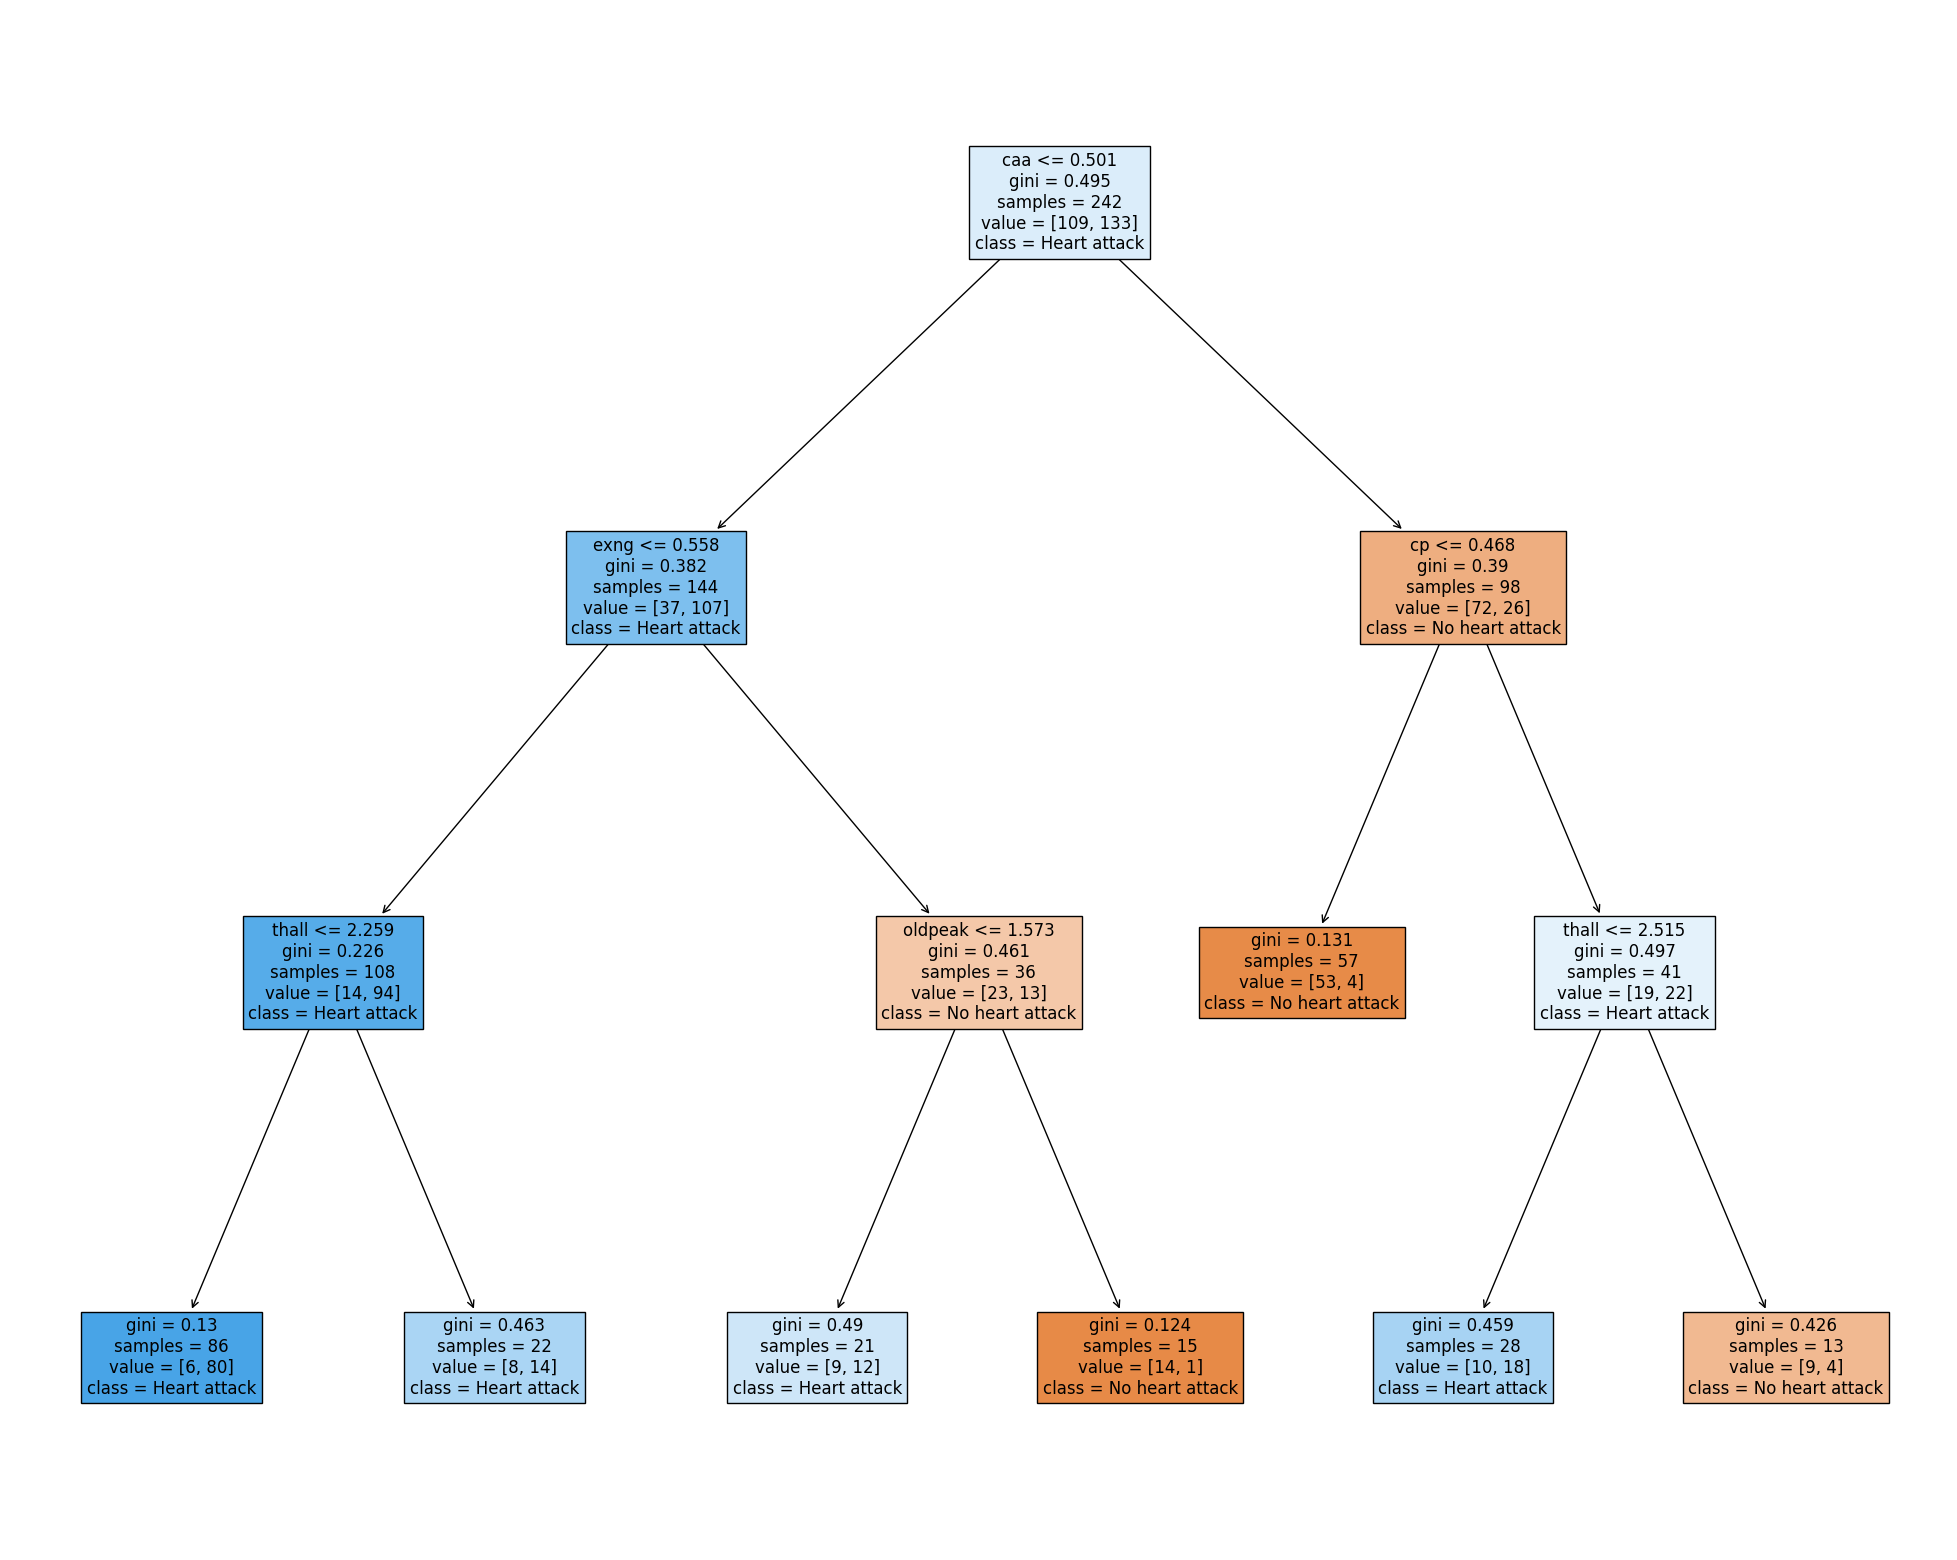

In [155]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(new_model,
                   feature_names=X.columns,
                   class_names={0:'No heart attack', 1:'Heart attack'},
                   filled=True, fontsize=12)

Above is the depiction of the new and improved decision tree model.

## Summary
In summary, after selecting the features using the feature importance score, the model's accuracy on predicting heart attacks improves to around 85.2% (3.28% improvement). It should be noted that the model is trained using a dataset that is not that big (303 rows). The model can be improved with the introduction of more data.

## Download Model

In [162]:
import joblib
from google.colab import files

joblib.dump(new_model, 'heart_model.pkl')
files.download('heart_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>